In [115]:
!pwd
!ls


/content/drive/MyDrive
'Colab Notebooks'	        part4_task4_annotations.png
 part4_task2_scatter_line.pdf   penguins_cleaned.csv
 part4_task2_scatter_line.png   RECENT_PIC_2.JPG
 part4_task3_dual_axis.pdf     'Visa Acceptance %.gdoc'
 part4_task3_dual_axis.png     'Zolve testimonial .mp4'
 part4_task4_annotations.pdf


In [116]:
from google.colab import drive
drive.mount('/content/drive')
%cd ..
%cd /content/drive/MyDrive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive
/content/drive/MyDrive


### I have considered 3 datasets :
#### 1.) penguins.csv
#### 2.) emissions_by_country.csv
#### 3.) diamond.csv

# Part - 1

## Step -I

In [191]:
# 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
# 2
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/noisy_datasets/penguins.csv')
df.head()


,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,Adelie,Torgersen,6563,11,39.1,18.7,181.0,3750.0,male,2007.0
1,Adelie,Torgersen,4890,14,39.5,17.4,186.0,3800.0,female,2007.0
2,Adelie,Torgersen,7184,11,40.3,18.0,195.0,3250.0,female,2007.0
3,Adelie,Torgersen,4169,8,NaN,NaN,NaN,992.0,NaN,2007.0
4,Adelie,Torgersen,4774,8,36.7,19.3,193.0,3450.0,female,2007.0


In [119]:
df.shape

(344, 10)

In [120]:
df.dtypes

,0
species,object
island,object
calorie requirement,int64
average sleep duration,int64
bill_length_mm,float64
bill_depth_mm,float64
flipper_length_mm,float64
body_mass_g,float64
gender,object
year,float64


The dataset describes about different species of penguins and their habitat. This dataset also conveys the nature of penguins and their body specifications.

In [121]:
# 3
df.describe()

,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,344.000000,337.000000,333.000000,336.000000,339.000000,342.000000
mean,5270.002907,10.447674,45.494214,18.018318,197.764881,4175.463127,2008.035088
std,1067.959116,2.265895,10.815787,9.241384,27.764491,858.713267,0.816938
min,3504.000000,7.000000,32.100000,13.100000,10.000000,882.000000,2007.000000
25%,4403.000000,9.000000,39.500000,15.700000,190.000000,3550.000000,2007.000000
50%,5106.500000,10.000000,45.100000,17.300000,197.000000,4050.000000,2008.000000
75%,6212.750000,12.000000,49.000000,18.700000,213.000000,4750.000000,2009.000000
max,7197.000000,14.000000,124.300000,127.260000,231.000000,6300.000000,2009.000000


In [122]:
df.isnull().sum()

,0
species,11
island,10
calorie requirement,0
average sleep duration,0
bill_length_mm,7
bill_depth_mm,11
flipper_length_mm,8
body_mass_g,5
gender,17
year,2


8 columns [species, island, bill_length_mm, bill_dept_mm, flipper_length_mm, body_mass_g, gender, year] have missing values.

In [123]:
# 4
def ImputeKNN(df, k=3):
    dfImputed = df.copy()
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    for feature in numeric_columns:
        missing_rows = dfImputed[dfImputed[feature].isna()].index

        for row_idx in missing_rows:
            target_row = dfImputed.loc[row_idx, numeric_columns]
            candidate_rows = dfImputed[dfImputed[feature].notna()]
            distance_list = []

            for candidate_idx, candidate_row in candidate_rows.iterrows():
                common_columns = target_row.notna() & candidate_row.notna()
                if common_columns.sum() == 0:
                    continue
                distance = np.sqrt(((target_row[common_columns] - candidate_row[common_columns])**2).sum())
                distance_list.append((candidate_idx, distance))

            nearest_neighbors = sorted(distance_list, key=lambda x: x[1])[:k]
            neighbor_values = [dfImputed.loc[idx, feature] for idx, _ in nearest_neighbors]

            dfImputed.at[row_idx, feature] = np.mean(neighbor_values)

    return dfImputed


### Explaination:

It will consider the missing value rows in each numeric column and computes the distance between that row and other candidate rows which have non-null vlaues. The top k rows with the less distance will be considered and calculate the mean value to replace the missing values. This process is computatonally intensive when handling large datasets. So, instead sometimes we directly drop the row.

In [124]:
if df.shape[0] > 20000:
    print("Dataset is large, dropping rows with missing values...")
    cleaned_df = df.dropna()
else:
    print("Dataset is small, So applying KNN imputation...")
    cleaned_df = ImputeKNN(df, k=5)

print("Shape of Final Cleaned Dataset:", cleaned_df.shape)

Dataset is small, So applying KNN imputation...
Shape of Final Cleaned Dataset: (344, 10)


In [125]:
# 5
cleaned_df['species'] = df['species'].str.strip().str.lower()
cleaned_df['island'] = df['island'].str.strip().str.lower()
cleaned_df['gender'] = df['gender'].str.strip().str.lower()


In [126]:
cleaned_df.head()

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,adelie,torgersen,6563,11,39.100,18.70,181.0,3750.0,male,2007.0
1,adelie,torgersen,4890,14,39.500,17.40,186.0,3800.0,female,2007.0
2,adelie,torgersen,7184,11,40.300,18.00,195.0,3250.0,female,2007.0
3,adelie,torgersen,4169,8,59.258,17.18,191.6,992.0,NaN,2007.0
4,adelie,torgersen,4774,8,36.700,19.30,193.0,3450.0,female,2007.0


In [127]:
#6
numeric_cols = cleaned_df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    Q1 = cleaned_df[col].quantile(0.25)
    Q3 = cleaned_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lb = Q1 - 1.5 * IQR
    ub = Q3 + 1.5 * IQR
    outlier_mask = (cleaned_df[col] < lb) | (cleaned_df[col] > ub)
    if outlier_mask.any():
        mode_val = cleaned_df[col].mode()[0]
        if pd.api.types.is_integer_dtype(cleaned_df[col]):
            mode_val = int(mode_val)
        cleaned_df.loc[outlier_mask, col] = mode_val

### I thought replacing the missing values with mean or median could prone to error. For example, a column has discrete integers replacing missing values with mean or median can push float values into that particular column which can raise errors.So I used mode instead

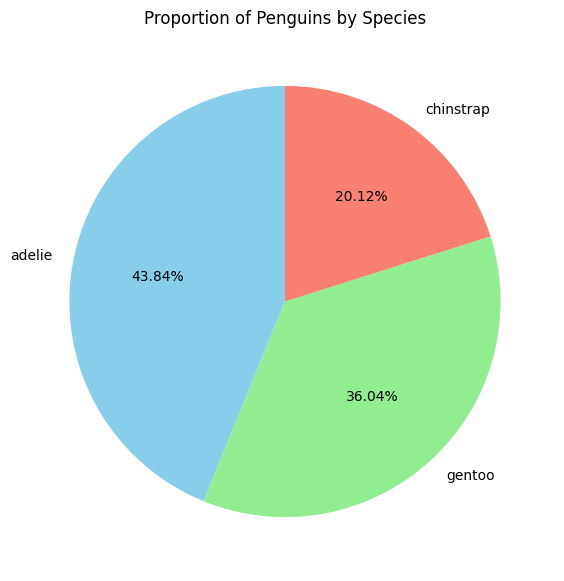

In [128]:
species_counts = cleaned_df['species'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(species_counts.values, labels=species_counts.index,
        autopct='%1.2f%%', startangle=90, colors=['skyblue','lightgreen','salmon'])
plt.title("Proportion of Penguins by Species")
plt.show()


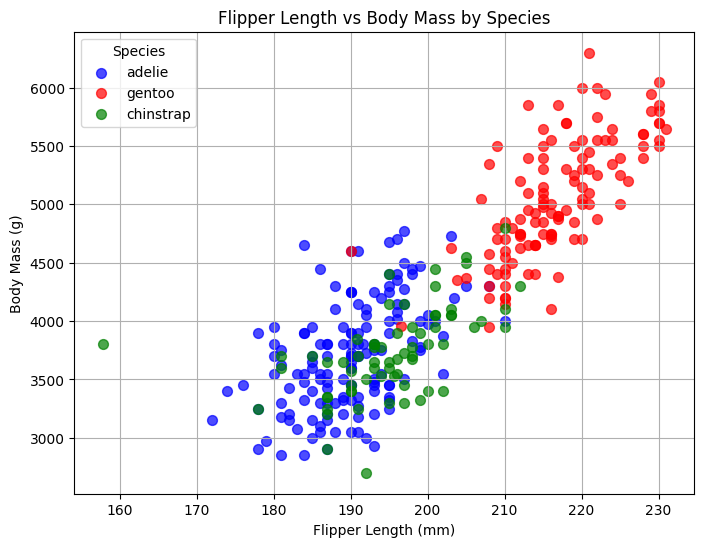

In [129]:

colors = {'adelie': 'blue', 'chinstrap': 'green', 'gentoo': 'red'}
plt.figure(figsize=(8,6))
for sp in cleaned_df['species'].dropna().unique():
    subset = cleaned_df[cleaned_df['species'] == sp]
    plt.scatter(subset['flipper_length_mm'], subset['body_mass_g'],
                label=sp, color=colors[sp], s=50, alpha=0.7)

plt.title("Flipper Length vs Body Mass by Species")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.legend(title="Species")
plt.grid(True)
plt.show()


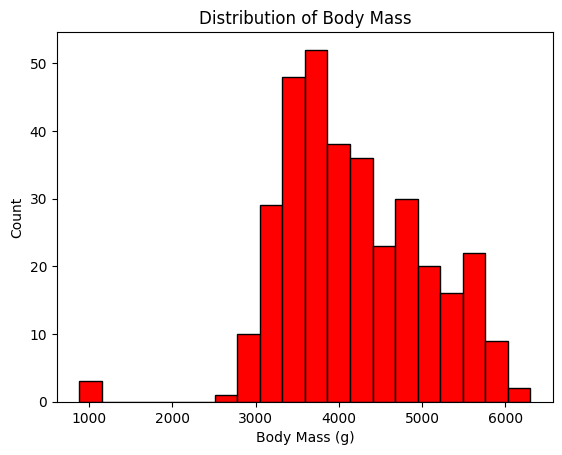

In [130]:
plt.figure()
plt.hist(df['body_mass_g'].dropna(), bins=20, color='red', edgecolor='black')
plt.title("Distribution of Body Mass")
plt.xlabel("Body Mass (g)")
plt.ylabel("Count")
plt.show()


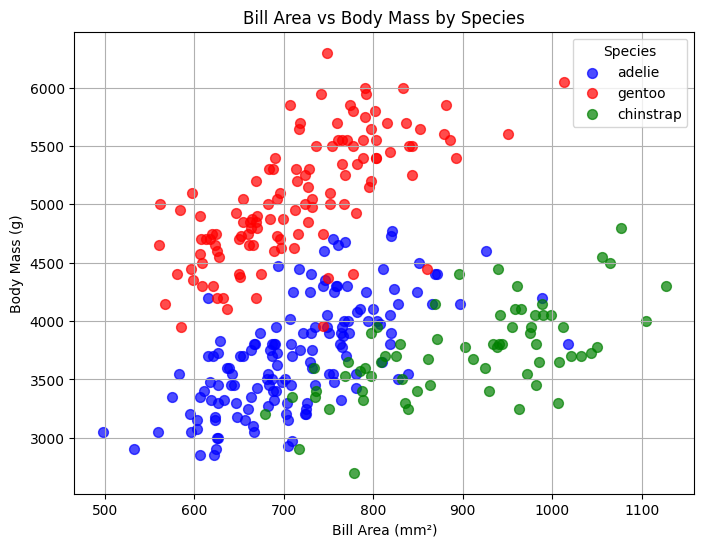

In [131]:
cleaned_df['bill_area'] = cleaned_df['bill_length_mm'] * cleaned_df['bill_depth_mm']
colors = {'adelie':'blue', 'chinstrap':'green', 'gentoo':'red'}
plt.figure(figsize=(8,6))
for sp in cleaned_df['species'].dropna().unique():
    subset = cleaned_df[cleaned_df['species'] == sp]
    plt.scatter(subset['bill_area'], subset['body_mass_g'],
                label=sp, color=colors[sp], s=50, alpha=0.7)

plt.title("Bill Area vs Body Mass by Species")
plt.xlabel("Bill Area (mm²)")
plt.ylabel("Body Mass (g)")
plt.legend(title="Species")
plt.grid(True)
plt.show()


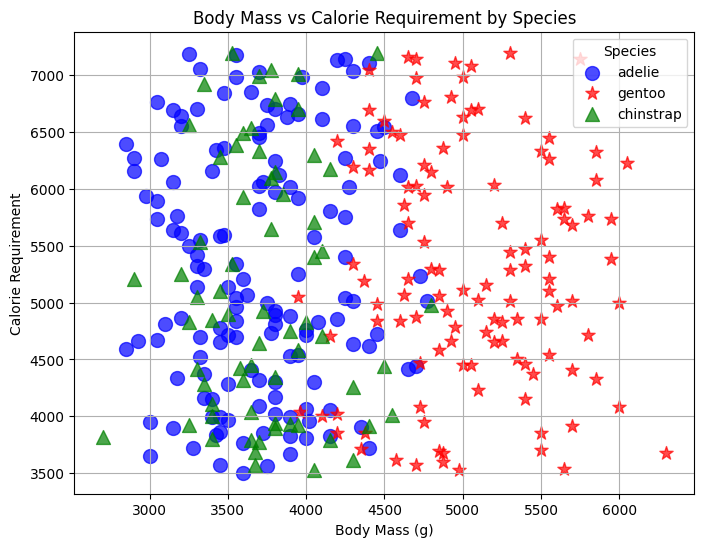

In [132]:
markers = {'adelie':'o','chinstrap':'^','gentoo':'*'}
colors = {'adelie':'blue', 'chinstrap':'green', 'gentoo':'red'}
plt.figure(figsize=(8,6))
for sp in cleaned_df['species'].dropna().unique():
    subset = cleaned_df[cleaned_df['species'] == sp]
    plt.scatter(subset['body_mass_g'], subset['calorie requirement'],
                label=sp, color=colors[sp], marker=markers[sp], s=100, alpha=0.7)

plt.title("Body Mass vs Calorie Requirement by Species")
plt.xlabel("Body Mass (g)")
plt.ylabel("Calorie Requirement")
plt.legend(title="Species")
plt.grid(True)
plt.show()

In [133]:
cleaned_df.head()

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year,bill_area
0,adelie,torgersen,6563,11,39.100,18.70,181.0,3750.0,male,2007.0,731.17000
1,adelie,torgersen,4890,14,39.500,17.40,186.0,3800.0,female,2007.0,687.30000
2,adelie,torgersen,7184,11,40.300,18.00,195.0,3250.0,female,2007.0,725.40000
3,adelie,torgersen,4169,8,59.258,17.18,191.6,3800.0,NaN,2007.0,1018.05244
4,adelie,torgersen,4774,8,36.700,19.30,193.0,3450.0,female,2007.0,708.31000


In [134]:
# 8 & 9
cleaned_df = cleaned_df.dropna(subset=['gender'])
cleaned_df['gender_binary'] = cleaned_df['gender'].map({'female': 0, 'male': 1})

categorical_cols = cleaned_df.select_dtypes(include='object').columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'gender']

cleaned_df_encoded = pd.get_dummies(cleaned_df, columns=categorical_cols, drop_first=True)

In [135]:
numericFeatures = cleaned_df_encoded.select_dtypes(include=['number']).columns.tolist()
correlations = cleaned_df_encoded[numericFeatures].corr()['gender_binary'].sort_values(ascending=False)

print("Correlation of features with the target (gender):\n")
print(correlations)

threshold = 0.1  # I used this manually
weak_features = correlations[abs(correlations) < threshold].index.tolist()
print()
print("Features with weak correlation:")
print(weak_features)

updated_cleaned_df = cleaned_df_encoded.drop(columns=weak_features)

Correlation of features with the target (gender):

gender_binary             1.000000
bill_area                 0.545006
body_mass_g               0.434348
bill_depth_mm             0.358913
bill_length_mm            0.346868
flipper_length_mm         0.269863
average sleep duration    0.064810
year                      0.002424
calorie requirement      -0.008478
Name: gender_binary, dtype: float64

Features with weak correlation:
['average sleep duration', 'year', 'calorie requirement']


In [136]:
updated_cleaned_df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,bill_area,gender_binary,species_chinstrap,species_gentoo,island_dream,island_torgersen
0,39.1,18.7,181.0,3750.0,male,731.17,1,False,False,False,True
1,39.5,17.4,186.0,3800.0,female,687.30,0,False,False,False,True
2,40.3,18.0,195.0,3250.0,female,725.40,0,False,False,False,True
4,36.7,19.3,193.0,3450.0,female,708.31,0,False,False,False,True
5,39.3,20.6,190.0,3650.0,male,809.58,1,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,male,1104.84,1,True,False,True,False
340,43.5,18.1,202.0,3400.0,female,787.35,0,True,False,True,False
341,49.6,18.2,193.0,3775.0,male,902.72,1,True,False,True,False
342,50.8,19.0,210.0,4100.0,male,965.20,1,True,False,True,False


In [137]:
#10
numeric_cols = updated_cleaned_df.select_dtypes(include=['number']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != 'gender_binary']
for col in numeric_cols:
    col_min = updated_cleaned_df[col].min()
    col_max = updated_cleaned_df[col].max()
    updated_cleaned_df[col] = (updated_cleaned_df[col] - col_min) / (col_max - col_min)

print(updated_cleaned_df[numeric_cols].head())


   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  bill_area
0        0.254545       0.666667           0.152542     0.291667   0.370937
1        0.269091       0.511905           0.237288     0.305556   0.301281
2        0.298182       0.583333           0.389831     0.152778   0.361776
4        0.167273       0.738095           0.355932     0.208333   0.334641
5        0.261818       0.892857           0.305085     0.263889   0.495435


In [138]:
updated_cleaned_df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,bill_area,gender_binary,species_chinstrap,species_gentoo,island_dream,island_torgersen
0,0.254545,0.666667,0.152542,0.291667,male,0.370937,1,False,False,False,True
1,0.269091,0.511905,0.237288,0.305556,female,0.301281,0,False,False,False,True
2,0.298182,0.583333,0.389831,0.152778,female,0.361776,0,False,False,False,True
4,0.167273,0.738095,0.355932,0.208333,female,0.334641,0,False,False,False,True
5,0.261818,0.892857,0.305085,0.263889,male,0.495435,1,False,False,False,True


 # Step-2

In [139]:

class PreprocessPipeline:
    def __init__(self, target=None, drop_threshold=20000, k=3, scale=True):
        self.drop_threshold = drop_threshold
        self.k = k
        self.scale = scale
        self.target = target

    def ImputeKNN(self, df, k=3):
        dfImputed = df.copy()
        numeric_columns = df.select_dtypes(include=[np.number]).columns
        for feature in numeric_columns:
            missing_rows = dfImputed[dfImputed[feature].isna()].index

            for row_idx in missing_rows:
                target_row = dfImputed.loc[row_idx, numeric_columns]
                candidate_rows = dfImputed[dfImputed[feature].notna()]
                distance_list = []

                for candidate_idx, candidate_row in candidate_rows.iterrows():
                    common_columns = target_row.notna() & candidate_row.notna()
                    if common_columns.sum() == 0:
                        continue
                    distance = np.sqrt(((target_row[common_columns] - candidate_row[common_columns])**2).sum())
                    distance_list.append((candidate_idx, distance))

                nearest_neighbors = sorted(distance_list, key=lambda x: x[1])[:k]
                neighbor_values = [dfImputed.loc[idx, feature] for idx, _ in nearest_neighbors]

                dfImputed.at[row_idx, feature] = np.mean(neighbor_values)

        return dfImputed

    def HandleMissingValues(self, df):
        if df.shape[0] > self.drop_threshold:
            return df.dropna()
        else:
            return self.ImputeKNN(df, self.k)

    def FormatStrings(self, df):
        df_copy = df.copy()
        obj_cols = df_copy.select_dtypes(include='object').columns

        for col in obj_cols:
            df_copy[col] = df_copy[col].astype(str).str.strip().str.lower()

        return df_copy

    def HandleOutliers(self, df):
        df_copy = df.copy()
        numeric_cols = df_copy.select_dtypes(include=[np.number]).columns

        for col in numeric_cols:
            Q1 = df_copy[col].quantile(0.25)
            Q3 = df_copy[col].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            mask = (df_copy[col] < lower_bound) | (df_copy[col] > upper_bound)

            if mask.any():
                mode_val = df_copy[col].mode()[0]
                if pd.api.types.is_integer_dtype(df_copy[col]):
                    mode_val = int(mode_val)
                df_copy.loc[mask, col] = mode_val

        return df_copy

    def OneHotEncoding(self, df):
        df_copy = df.copy()
        categorical_cols = df_copy.select_dtypes(include=['object','string']).columns.tolist()

        if self.target in categorical_cols:
            categorical_cols.remove(self.target)

        df_encoded = pd.get_dummies(df_copy, columns=categorical_cols, drop_first=True)
        return df_encoded

    def Normalize(self, df):
        if not self.scale:
            return df

        df_copy = df.copy()
        numeric_cols = df_copy.select_dtypes(include='number').columns.tolist()

        if self.target and self.target in numeric_cols:
            numeric_cols.remove(self.target)

        for col in numeric_cols:
            col_min = df_copy[col].min()
            col_max = df_copy[col].max()
            if col_max != col_min:
                df_copy[col] = (df_copy[col] - col_min) / (col_max - col_min)

        return df_copy

    def fit_transform(self, df):
        df_output = self.HandleMissingValues(df)
        df_output = self.FormatStrings(df_output)
        df_output = self.HandleOutliers(df_output)
        df_output = self.OneHotEncoding(df_output)
        df_output = self.Normalize(df_output)
        return df_output


In [140]:

df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/noisy_datasets/penguins.csv")

pipeline = PreprocessPipeline()
cleaned_df = pipeline.fit_transform(df)

output_path = "/content/drive/MyDrive/Colab Notebooks/noisy_datasets/penguins_preprocessed.csv"
cleaned_df.to_csv(output_path, index=False)

print(f"Preprocessed dataset saved in the path: {output_path}")

Preprocessed dataset saved in the path: /content/drive/MyDrive/Colab Notebooks/noisy_datasets/penguins_preprocessed.csv


# Summary after applying PreProcessingPipeLine on penguins dataset

## Handling missing Values:
### If the dataset size is too large, we drectly drop the missing value rows as it doesn't much effect the model. If the dataset size is small, we use KNN to replace the missing values with corresponding mean vlues of nearest neighbours

## Min/MaxScaling:
### This is done to normalise the values so that model wont become biased

## Features Encoded:
### The features that were encoded are the categorical columns like island, species etc. using one-hot encoding

In [141]:
df3 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/noisy_datasets/penguins_preprocessed.csv")
df3

,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_chinstrap,species_gentoo,species_nan,island_dream,island_nan,island_torgersen,gender_male,gender_nan
0,0.828324,0.571429,0.254545,0.666667,0.152542,0.291667,0.0,False,False,False,False,False,True,True,False
1,0.375305,1.000000,0.269091,0.511905,0.237288,0.305556,0.0,False,False,False,False,False,True,False,False
2,0.996480,0.571429,0.298182,0.583333,0.389831,0.152778,0.0,False,False,False,False,False,True,False,False
3,0.180070,0.142857,0.327273,0.440476,0.384181,0.305556,0.0,False,False,False,False,False,True,False,True
4,0.343894,0.142857,0.167273,0.738095,0.355932,0.208333,0.0,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,0.357975,0.571429,0.861818,0.797619,0.593220,0.361111,1.0,True,False,False,True,False,False,True,False
340,0.164365,0.285714,0.414545,0.595238,0.508475,0.194444,1.0,True,False,False,True,False,False,False,False
341,0.959924,0.428571,0.636364,0.607143,0.355932,0.298611,1.0,True,False,False,True,False,False,True,False
342,0.325210,0.000000,0.680000,0.702381,0.644068,0.388889,1.0,True,False,False,True,False,False,True,False


### Clearly you can observe that I output in Step-I and Step-II are matching even though there are some extra columns in Step-II's Output because some attributes are not removed since correlation is not yet performed.

# Step-3 (Diamond Dataset)

In [142]:
diamond_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/noisy_datasets/diamond.csv')
diamond_df.head()

,Unnamed: 0,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,31282,5.01,61.5,55,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,40049,1.69,59.8,61,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,33517,3.85,56.9,65,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,38495,3.49,62.4,58,334,4.2,4.23,2.63
4,5,0.31,Good,J,SI2,34178,4.70,63.3,58,335,4.34,4.35,2.75


### This dataset describes about the diamonds containing various attributes such as carat, cut,color,x,y,z etc. This dataset contains some corrupted values which should be removed beforehand to avoid unnecessary errors

In [143]:
diamond_df.shape

(53940, 13)

In [144]:
diamond_df.dtypes

,0
Unnamed: 0,object
carat,object
cut,object
color,object
clarity,object
average us salary,int64
number of diamonds mined (millions),float64
depth,object
table,object
price,object


In [145]:
diamond_cols = diamond_df.columns
diamond_cols

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'average us salary',
       'number of diamonds mined (millions)', 'depth', 'table', 'price', 'x',
       'y', 'z'],
      dtype='object')

### This is Diamond Dataset containing both numerical and categorical features. Clearly there are columns like average US Salary and number of diamonds mined which meant to be external i.e. not directly related to the data.

### Also the data is not cleaned. Some columns have string values instead int/float.

In [146]:
diamond_df = diamond_df.drop(columns=['Unnamed: 0'])
numeric_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'number of diamonds mined (millions)']

for col in numeric_cols:
    diamond_df[col] = pd.to_numeric(diamond_df[col], errors='coerce')

categorical_cols = ['cut', 'color', 'clarity']
for col in categorical_cols:
    diamond_df[col] = diamond_df[col].astype('object')

diamond_df = diamond_df.dropna()


In [147]:
diamond_df

,carat,cut,color,clarity,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,31282,5.01,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,40049,1.69,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,33517,3.85,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,38495,3.49,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,34178,4.70,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,43892,3.54,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,35532,3.51,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,32133,3.27,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,44248,4.03,61.0,58.0,2757.0,6.15,6.12,3.74


In [148]:
pipeline = PreprocessPipeline()
cleaned_diamond_df = pipeline.fit_transform(diamond_df)

### I have considered 'price' as the target variable such as predicting whether its high price or low price

In [149]:
median_price = cleaned_diamond_df['price'].median()
cleaned_diamond_df['target'] = (cleaned_diamond_df['price'] > median_price).astype(int)
cleaned_diamond_df.drop(columns=['price'])

,carat,average us salary,number of diamonds mined (millions),depth,table,x,y,z,cut_false,cut_good,...,clarity_i1,clarity_if,clarity_si1,clarity_si2,clarity_true,clarity_vs1,clarity_vs2,clarity_vvs1,clarity_vvs2,target
0,0.016667,0.067477,0.958696,0.457627,0.285714,0.039783,0.053763,0.238318,False,False,...,False,False,False,True,False,False,False,False,False,0
1,0.005556,0.528923,0.236957,0.169492,0.789916,0.028933,0.028674,0.210280,False,False,...,False,False,True,False,False,False,False,False,False,0
2,0.016667,0.185115,0.706522,0.542373,0.369748,0.057866,0.069892,0.210280,False,True,...,False,False,False,False,False,True,False,False,False,0
3,0.050000,0.447129,0.628261,0.610169,0.537815,0.084991,0.098566,0.285047,False,False,...,False,False,False,False,False,False,True,False,False,0
4,0.061111,0.219906,0.891304,0.762712,0.537815,0.110307,0.120072,0.313084,False,True,...,False,False,False,True,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.288889,0.731196,0.639130,0.338983,0.453782,0.365280,0.372760,0.488318,False,False,...,False,False,True,False,False,False,False,False,False,1
53936,0.288889,0.291173,0.632609,0.728814,0.285714,0.354430,0.370968,0.514019,False,True,...,False,False,True,False,False,False,False,False,False,1
53937,0.277778,0.112269,0.580435,0.677966,0.705882,0.349005,0.358423,0.502336,False,False,...,False,False,True,False,False,False,False,False,False,1
53938,0.366667,0.749934,0.745652,0.372881,0.537815,0.437613,0.437276,0.544393,False,False,...,False,False,False,True,False,False,False,False,False,1


In [186]:
class_counts = cleaned_diamond_df['target'].value_counts()
class_counts

,count
target,
0,24421
1,24410


## Summary

### Missingness Strategy:

#### Since, dataset is comparitively large than penguins dataset So, I just dropped the missing values. Coming to corrupted values, I just converted them into NaN and deleted the missing rows.

### Outliers:
#### I considered a thredhold value and calculated the correlation values and removed values based on those calculations


### Encoded Columns:
#### Columns such as clarity,cut, color has been encoded using one-hot encoding

### Scaling:
#### Numeric features such as avg us salary,x,y,x .....are scaled using min/max scaling

In [150]:
cleaned_diamond_df.head()

,carat,average us salary,number of diamonds mined (millions),depth,table,price,x,y,z,cut_false,...,clarity_i1,clarity_if,clarity_si1,clarity_si2,clarity_true,clarity_vs1,clarity_vs2,clarity_vvs1,clarity_vvs2,target
0,0.016667,0.067477,0.958696,0.457627,0.285714,0.000000,0.039783,0.053763,0.238318,False,...,False,False,False,True,False,False,False,False,False,0
1,0.005556,0.528923,0.236957,0.169492,0.789916,0.000000,0.028933,0.028674,0.210280,False,...,False,False,True,False,False,False,False,False,False,0
2,0.016667,0.185115,0.706522,0.542373,0.369748,0.000087,0.057866,0.069892,0.210280,False,...,False,False,False,False,False,True,False,False,False,0
3,0.050000,0.447129,0.628261,0.610169,0.537815,0.000692,0.084991,0.098566,0.285047,False,...,False,False,False,False,False,False,True,False,False,0
4,0.061111,0.219906,0.891304,0.762712,0.537815,0.000779,0.110307,0.120072,0.313084,False,...,False,False,False,True,False,False,False,False,False,0


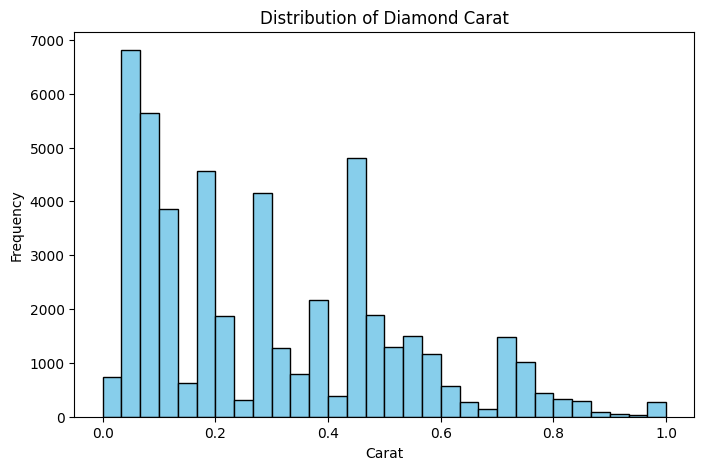

In [151]:
#4

plt.figure(figsize=(8,5))
plt.hist(cleaned_diamond_df['carat'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Diamond Carat")
plt.xlabel("Carat")
plt.ylabel("Frequency")
plt.show()

### Mostly the carat value ranging between 0 and 0.2 are most frequent one in the dataset

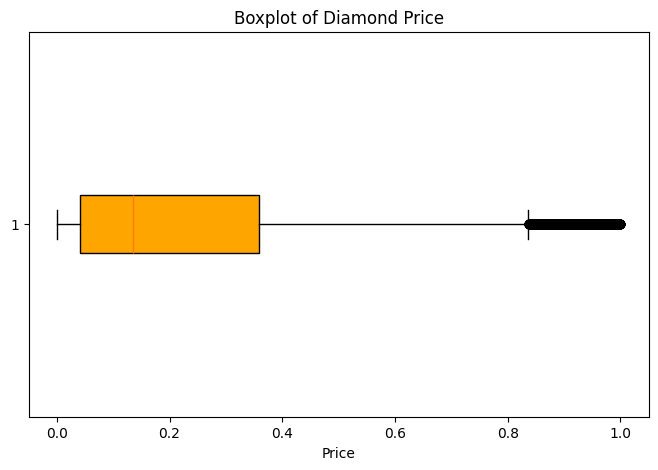

In [152]:
plt.figure(figsize=(8,5))
plt.boxplot(cleaned_diamond_df['price'], vert=False, patch_artist=True, boxprops=dict(facecolor='orange'))
plt.title('Boxplot of Diamond Price')
plt.xlabel('Price')
plt.show()

### There are different types of diamonds pricing in different way
### Most of the diamonds concentrated in lower price range

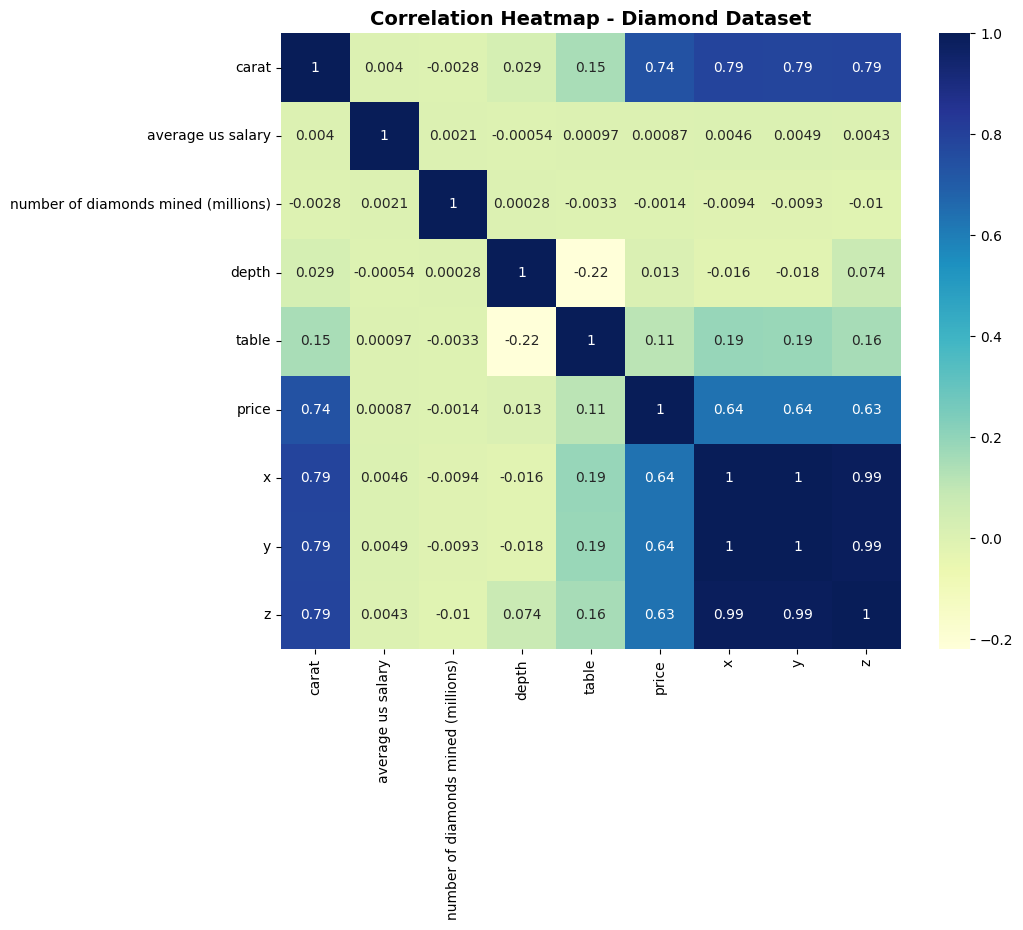

In [194]:
numeric_cols = ['carat', 'average us salary', 'number of diamonds mined (millions)','depth', 'table', 'price', 'x', 'y', 'z']
corr_matrix = cleaned_diamond_df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu")
plt.title('Correlation Heatmap - Diamond Dataset', fontsize=14, fontweight='bold')
plt.show()


### We can Observe strong positive correlations betweeen x,y,z attributes.
### Also price shows positive correlation with carat

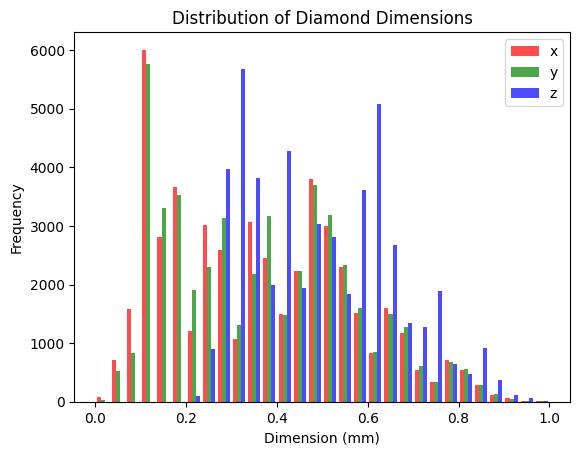

In [154]:

plt.hist([cleaned_diamond_df['x'], cleaned_diamond_df['y'], cleaned_diamond_df['z']], bins=30, alpha=0.7,
         label=['x', 'y', 'z'], color=['red', 'green', 'blue'])
plt.xlabel('Dimension (mm)')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Dimensions')
plt.legend()

### In Most of the diamonds x,y both have similar distributuion with slight variation but z is different from x,y. z greater than x,y between the 0.2 and 0.4

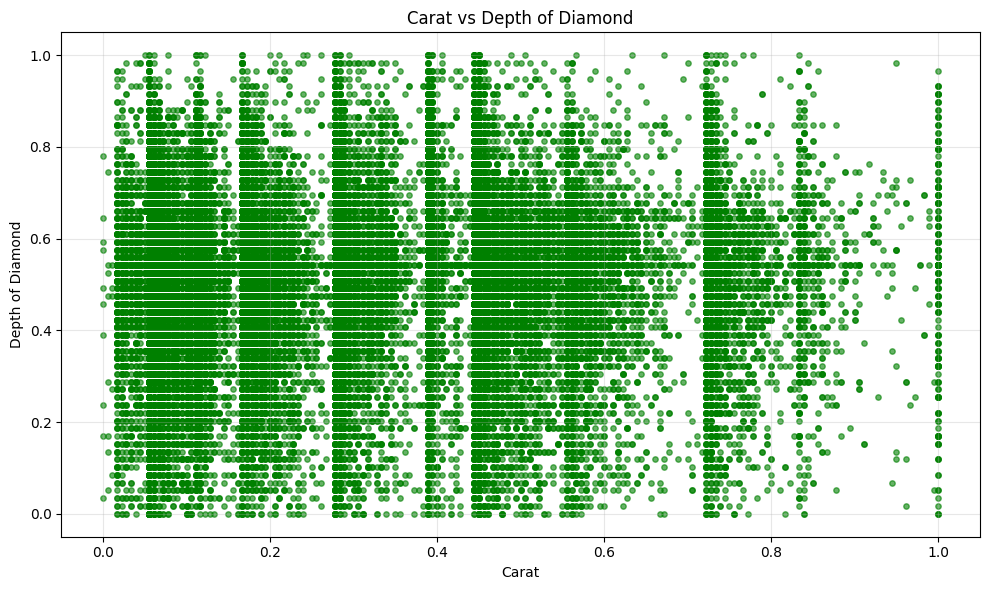

In [155]:
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_diamond_df['carat'], cleaned_diamond_df['depth'], alpha=0.6, color='green', s=15)
plt.xlabel('Carat')
plt.ylabel('Depth of Diamond')
plt.title('Carat vs Depth of Diamond')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Most of the values are situated with in the range of 0.4-0.6 with a depth of 0.4-0.6 mm

In [156]:
#5
output_path = "/content/drive/MyDrive/Colab Notebooks/noisy_datasets/diamond_preprocessed.csv"
cleaned_df.to_csv(output_path, index=False)

print(f"Preprocessed dataset saved in the path: {output_path}")


Preprocessed dataset saved in the path: /content/drive/MyDrive/Colab Notebooks/noisy_datasets/diamond_preprocessed.csv


# Step-3 (Emissions_by_Country Dataset)

In [157]:
emissions_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/noisy_datasets/emissions_by_country.csv')
emissions_df.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750.0,0.0,70,55455,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751.0,0.0,66,45101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752.0,0.0,72,31891,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753.0,0.0,44,35466,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754.0,0.0,21,33247,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
emissions_df.describe()

,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
count,62307.000000,62381.000000,63104.000000,63104.000000,21797.000000,21774.000000,21717.000000,20488.000000,21338.000000,2685.000000,19392.000000
mean,1888.267097,73.683456,49.497813,39026.539015,127.387271,153.480038,125.162671,62.599364,56.074327,849.395127,121.565443
std,122.651184,843.930381,17.292092,10975.539432,677.951392,670.830891,514.391435,353.918064,337.629062,1055.250022,489.339877
min,1003.000000,0.000000,20.000000,20000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1816.000000,0.000000,35.000000,29498.750000,0.000000,0.113584,0.000000,0.000000,0.000000,1.016000,0.231702
50%,1886.000000,0.000000,49.000000,39067.000000,0.344416,1.344688,0.000000,0.032709,0.000000,9.237945,1.601436
75%,1955.000000,0.659520,64.000000,48544.250000,8.500480,13.008908,1.683510,0.725079,0.000000,1812.000000,6.305100
max,2999.000000,37123.850352,79.000000,57999.000000,15051.512770,12345.653374,7921.829472,2982.000000,2994.000000,2999.000000,2997.000000


In [159]:
emissions_df.shape

(63104, 13)

In [160]:
emissions_df.dtypes

,0
Country,object
ISO 3166-1 alpha-3,object
Year,float64
Total,float64
Temperature,int64
GDP Per Capita (USD),int64
Coal,float64
Oil,float64
Gas,float64
Cement,float64


In [161]:
emissions_df = emissions_df.drop(columns=['ISO 3166-1 alpha-3'])

In [162]:
pipeline = PreprocessPipeline()
cleaned_emissions_df = pipeline.fit_transform(emissions_df)

### There is no direct target variable that we can pick from the dataset, but I have choosen 'temperature' as the target for predicting whether its 'high' or 'low' based on median values

In [163]:
median_price = cleaned_emissions_df['Temperature'].median()
cleaned_emissions_df['target'] = (cleaned_emissions_df['Temperature'] > median_price).astype(int)
cleaned_emissions_df.drop(columns=['Temperature'])

,Year,Total,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,...,Country_spain,Country_sweden,Country_switzerland,Country_taiwan,Country_turkey,Country_ukraine,Country_united kingdom,Country_usa,Country_wallis and futuna islands,target
2715,0.924528,0.005166,0.036156,0.000009,0.001801,0.022070,0.008086,0.000000,0.000000,0.086753,...,False,False,False,False,False,False,False,False,False,1
3232,0.415094,0.260573,0.420639,0.352766,0.189696,0.170419,0.136269,0.000000,0.217393,0.846803,...,False,False,False,False,False,False,False,False,False,0
3233,0.433962,0.261861,0.369594,0.363216,0.188422,0.162166,0.125257,0.978098,0.216186,0.839867,...,False,False,False,False,False,False,False,False,False,1
3234,0.452830,0.266542,0.322028,0.373083,0.187720,0.168024,0.115041,0.000000,0.228784,0.845617,...,False,False,False,False,False,False,False,False,False,1
3235,0.471698,0.270613,0.347063,0.373201,0.192995,0.176430,0.118239,0.997033,0.249572,0.850390,...,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63099,0.924528,0.000000,0.333360,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.235189,...,False,False,False,False,False,False,False,False,False,0
63100,0.943396,0.000000,0.044457,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.237466,...,False,False,False,False,False,False,False,False,False,0
63101,0.962264,0.000000,0.867236,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.236561,...,False,False,False,False,False,False,False,False,False,1
63102,0.981132,0.000000,0.521754,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.221850,...,False,False,False,False,False,False,False,False,False,0


In [164]:
class_counts = cleaned_emissions_df['target'].value_counts()
class_counts

,count
target,
0,767
1,742


## Summary

### Missingness Strategy:

#### The dataset is comparitively large enough than penguins dataset So, I just dropped the missing value rows.

### Outliers:
#### I considered a thredhold value and calculated the correlation values and removed some attributes like 'ISO 3166-1 alpha-3'

### Encoded Columns:
#### I have used one-hot encoding to encode columns such as 'Country'

### Scaling:
#### There are multiple Numeric features in this dataset such as Coal, Cement, Temperature, Year etc and these are scaled using min/max scaling so that the model doesn't become biased

In [165]:
cleaned_emissions_df.head()

,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Other,...,Country_spain,Country_sweden,Country_switzerland,Country_taiwan,Country_turkey,Country_ukraine,Country_united kingdom,Country_usa,Country_wallis and futuna islands,target
2715,0.924528,0.005166,0.915254,0.036156,0.000009,0.001801,0.022070,0.008086,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,1
3232,0.415094,0.260573,0.203390,0.420639,0.352766,0.189696,0.170419,0.136269,0.000000,0.217393,...,False,False,False,False,False,False,False,False,False,0
3233,0.433962,0.261861,0.966102,0.369594,0.363216,0.188422,0.162166,0.125257,0.978098,0.216186,...,False,False,False,False,False,False,False,False,False,1
3234,0.452830,0.266542,0.915254,0.322028,0.373083,0.187720,0.168024,0.115041,0.000000,0.228784,...,False,False,False,False,False,False,False,False,False,1
3235,0.471698,0.270613,0.016949,0.347063,0.373201,0.192995,0.176430,0.118239,0.997033,0.249572,...,False,False,False,False,False,False,False,False,False,0


In [166]:
cleaned_emissions_df.dtypes

,0
Year,float64
Total,float64
Temperature,float64
GDP Per Capita (USD),float64
Coal,float64
...,...
Country_ukraine,bool
Country_united kingdom,bool
Country_usa,bool
Country_wallis and futuna islands,bool


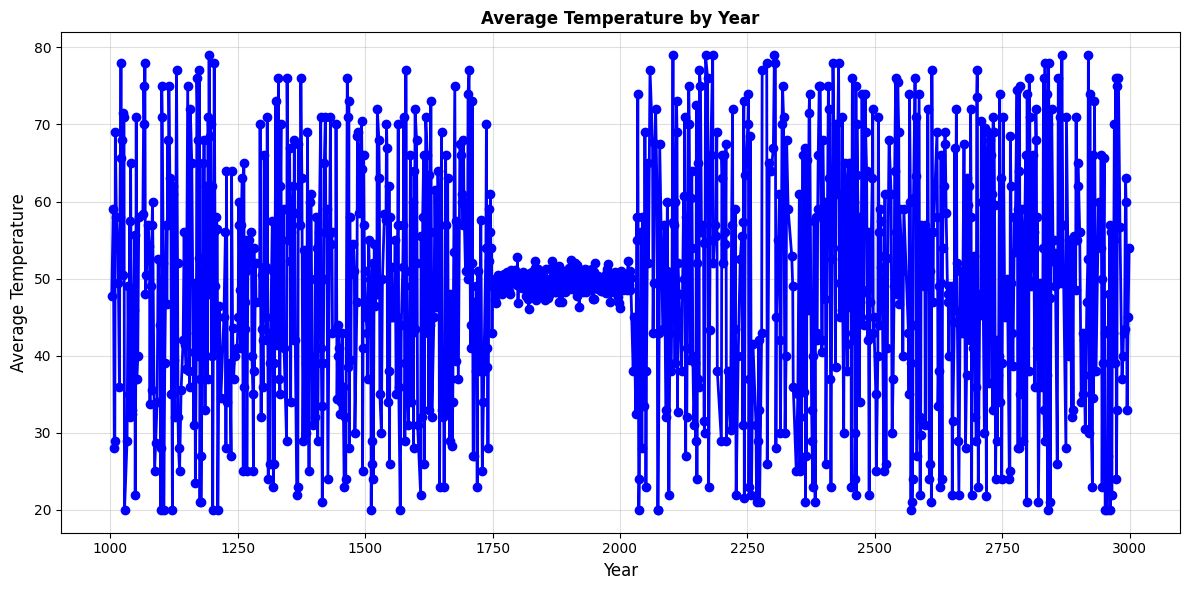

In [185]:
YearlyAvgTemp = emissions_df.groupby('Year')['Temperature'].mean()
plt.figure(figsize=(12, 6))
plt.plot(YearlyAvgTemp.index, YearlyAvgTemp.values, marker='o', linewidth=2, markersize=6, color='blue')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature', fontsize=12)
plt.title('Average Temperature by Year', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()

###  The visualisation is bit clumsy but we can see both highs and lows in average temperatures in a certain period. But, between 1750-2000, it showed a constant temperature of around 50 degree celcius

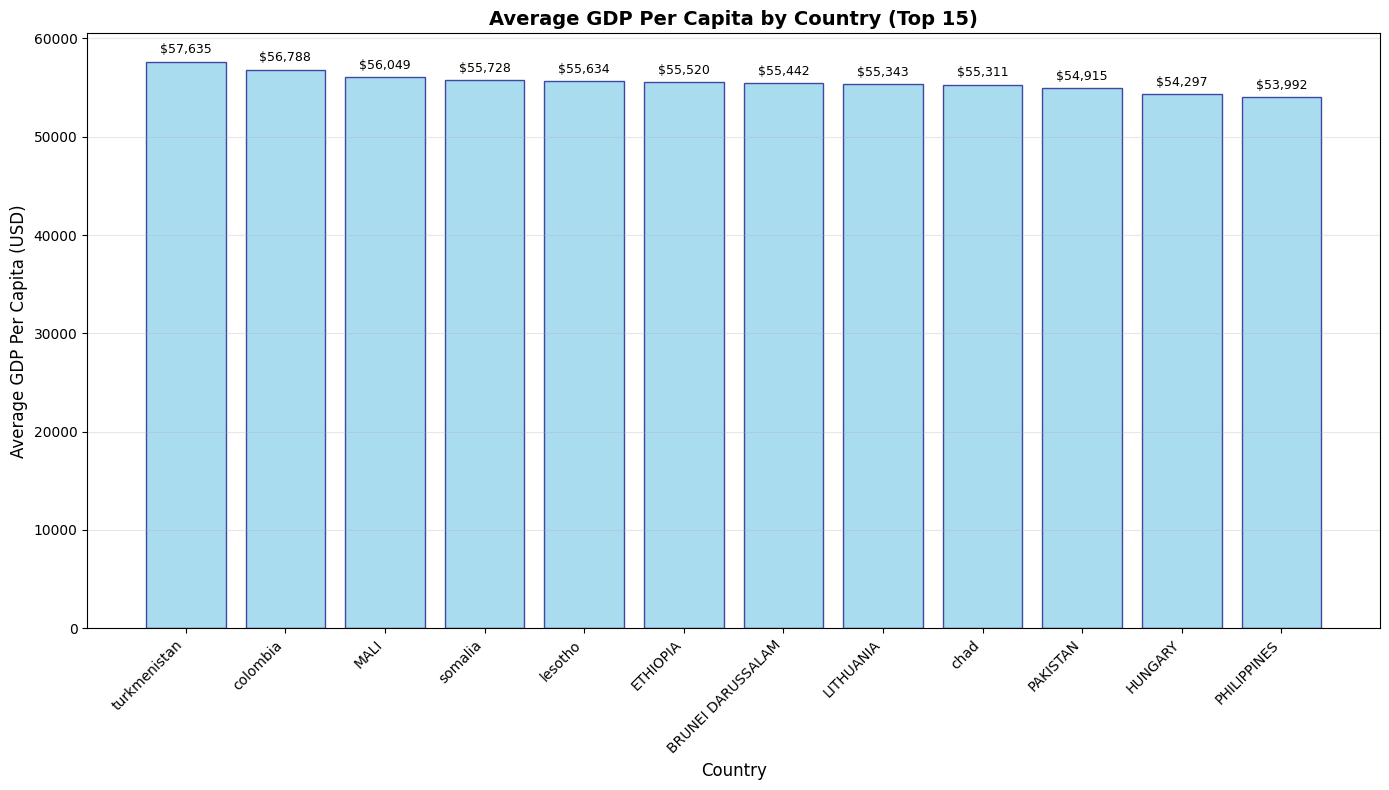

In [168]:
country_avg_gdp = emissions_df.groupby('Country')['GDP Per Capita (USD)'].mean().sort_values(ascending=False)
country_avg_gdp = country_avg_gdp.dropna()
top_countries = country_avg_gdp.head(12)

plt.figure(figsize=(14, 8))
bars = plt.bar(range(len(top_countries)), top_countries.values, color='skyblue', edgecolor='navy', alpha=0.7)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average GDP Per Capita (USD)', fontsize=12)
plt.title('Average GDP Per Capita by Country (Top 15)', fontsize=14, fontweight='bold')
plt.xticks(range(len(top_countries)), top_countries.index, rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

for i, (country, value) in enumerate(top_countries.items()):
    plt.text(i, value + max(top_countries.values)*0.01, f'${value:,.0f}',
             ha='center', va='bottom', fontsize=9, rotation=0)

plt.tight_layout()
plt.show()

### Almost all the countries have similar Average GDP as you can see above in graph. Eventhough this attribute is not directly related to emissions but can be useful to draw some conclusions.

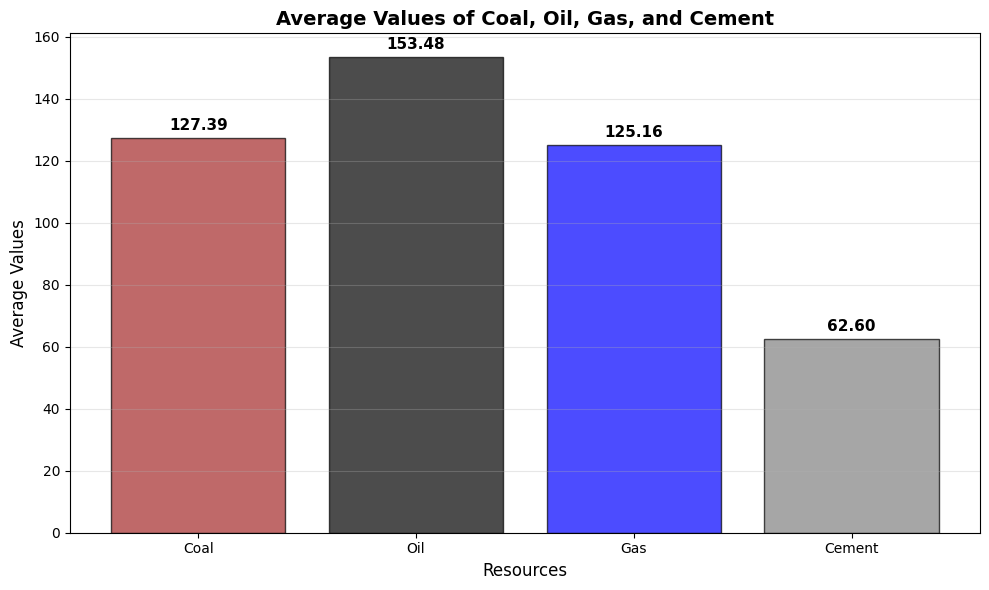

In [169]:
resources = ['Coal', 'Oil', 'Gas', 'Cement']
avg_values = [ emissions_df['Coal'].mean(), emissions_df['Oil'].mean(), emissions_df['Gas'].mean(), emissions_df['Cement'].mean()]

plt.figure(figsize=(10, 6))
bars = plt.bar(resources, avg_values,
               color=['brown', 'black', 'blue', 'gray'],
               alpha=0.7, edgecolor='black', linewidth=1)

plt.xlabel('Resources', fontsize=12)
plt.ylabel('Average Values', fontsize=12)
plt.title('Average Values of Coal, Oil, Gas, and Cement', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

for i, (resource, value) in enumerate(zip(resources, avg_values)):
    plt.text(i, value + max(avg_values)*0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

### Clearly among all the resources(Coal, Oil,Gas,Cement) Oil stands with the highest value in terms of emissions where as Cement takes the least value

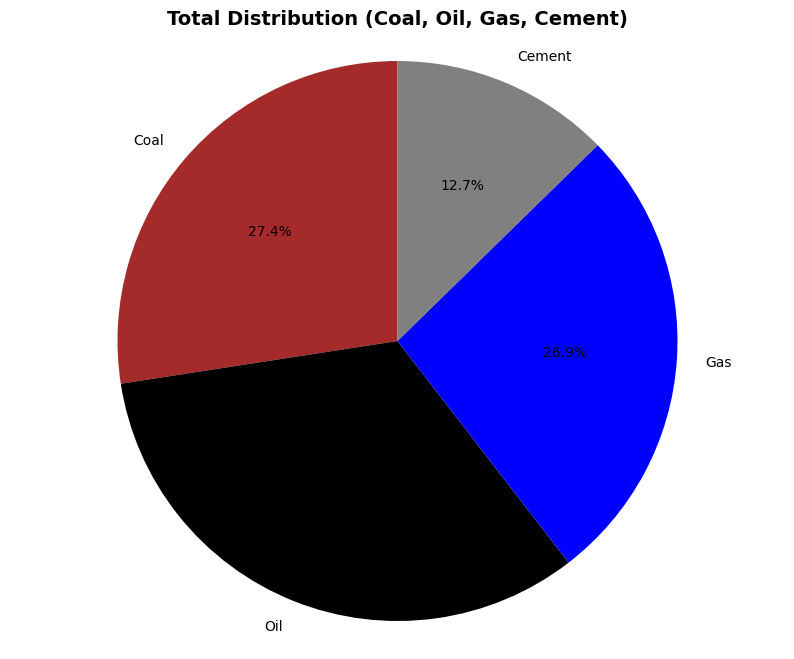

In [170]:
plt.figure(figsize=(10, 8))

total_coal = emissions_df['Coal'].sum()
total_oil = emissions_df['Oil'].sum()
total_gas = emissions_df['Gas'].sum()
total_cement = emissions_df['Cement'].sum()

resources = ['Coal', 'Oil', 'Gas', 'Cement']
totals = [total_coal, total_oil, total_gas, total_cement]
colors = ['brown', 'black', 'blue', 'gray']

plt.pie(totals, labels=resources, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Total Distribution (Coal, Oil, Gas, Cement)', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

### The above pie chart shows the total contribution of each resource (Coal, Oil, Gas, Cement) for emissions as percentages. We can observe oil contributed most of the distribution

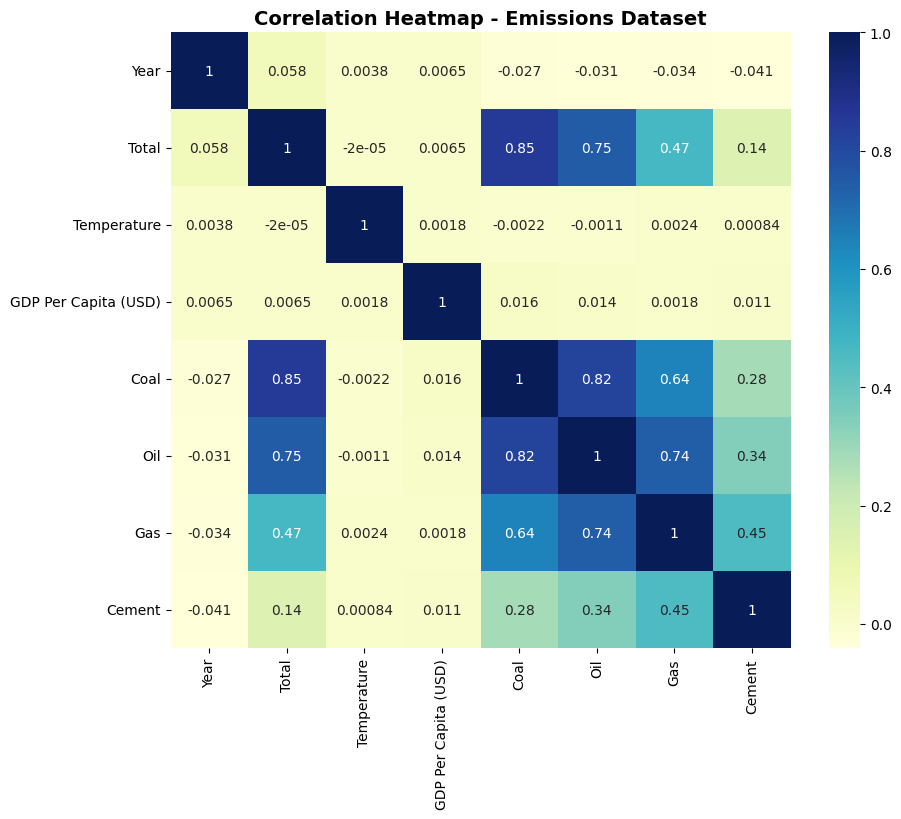

In [195]:
numeric_cols = ['Year', 'Total', 'Temperature', 'GDP Per Capita (USD)', 'Coal', 'Oil', 'Gas', 'Cement']
corr_matrix = emissions_df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,cmap="YlGnBu", annot=True)
plt.title('Correlation Heatmap - Emissions Dataset', fontsize=14, fontweight='bold')
plt.show()


### In the above heat map, strong postive correlations exist among the energy resources like Coal,gas,Oil,Cement

### Temperature shows almost zero with all other attributes

# Part -2

In [172]:
from math import ceil

### References

#### https://docs.python.org/3/
#### https://numpy.org/doc/2.3/
#### https://matplotlib.org/stable/index.html
#### https://en.wikipedia.org/wiki/Interquartile_range
#### https://www.geeksforgeeks.org/machine-learning/k-nearest-neighbours/
#### https://www.geeksforgeeks.org/python/how-to-create-a-seaborn-correlation-heatmap-in-python/
